나이: 1차 수혜자의 나이

성별: 보험 계약자 성별, 여성, 남성

bmi: 신체에 대한 이해를 제공하는 체질량 지수, 신장에 비해 상대적으로 높거나 낮은 체중, 신장
과 체중의 비율을 이용한 객관적인 체중 지수(kg/m^2), 이상적으로는 18.5~24.9

children: 건강보험이 적용되는 자녀 수 / 피부양자 수

흡연자: 흡연

지역: 수혜자의 미국 거주 지역, 북동부, 남동부, 남서부, 북서부.

요금: 건강 보험에서 청구하는 개별 의료 비용

감사의 말
데이터 세트는 여기 GitHub에서 사용할 수 있습니다 .

영감
보험 비용을 정확하게 예측할 수 있습니까?

In [356]:
import calendar
import numpy as np
import pandas as pd
#from pandas.core.frame import DataFrame
#from pandas.core.series import Series #이렇게 불러도 됨.
import seaborn as sns # 통계적 plot
from scipy import stats #통계
import missingno as msno #결측치 보는 plot
from datetime import datetime #day
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings #에러는 아닌데 주희하는게 뜨는것을 방지.
warnings.filterwarnings('ignore')
df_data = pd.read_csv('https://raw.githubusercontent.com/the9world/My_Study/main/Z_running_file/Medical_Cost_Personal_Datasets/insurance.csv')

In [357]:
df_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [358]:
df_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [359]:
df_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [360]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [361]:
df_data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [362]:
df_data.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<Axes: xlabel='sex', ylabel='count'>

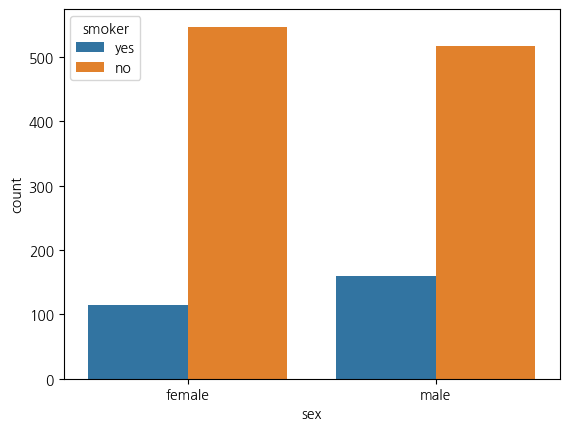

In [363]:
sns.countplot(x='sex', hue='smoker', data= df_data)

<Axes: xlabel='age', ylabel='count'>

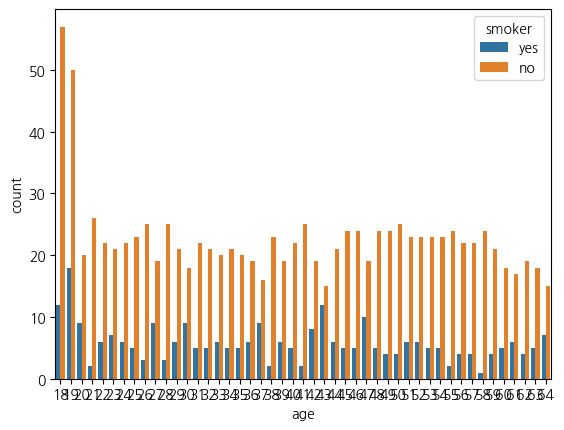

In [364]:
sns.countplot(x='age', hue='smoker', data= df_data)

In [677]:
df_data['sex']=df_data["sex"].replace({'male':0, 'female':1})
df_data['smoker']=df_data["smoker"].replace({'yes':0, 'no':1})
df_data['region']=df_data["region"].replace({'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3 })
df_data

,age,gender,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


(array([69., 68., 29., 28., 28., 28., 28., 28., 28., 28., 28., 27.,  0.,
        27., 27., 26., 26., 26., 25., 25., 25., 25., 25., 27.,  0., 27.,
        27., 27., 27., 29., 29., 29., 29., 28., 29., 29., 29.,  0., 28.,
        28., 26., 26., 26., 25., 25., 23., 23., 23., 23., 22.]),
 array([18.  , 18.92, 19.84, 20.76, 21.68, 22.6 , 23.52, 24.44, 25.36,
        26.28, 27.2 , 28.12, 29.04, 29.96, 30.88, 31.8 , 32.72, 33.64,
        34.56, 35.48, 36.4 , 37.32, 38.24, 39.16, 40.08, 41.  , 41.92,
        42.84, 43.76, 44.68, 45.6 , 46.52, 47.44, 48.36, 49.28, 50.2 ,
        51.12, 52.04, 52.96, 53.88, 54.8 , 55.72, 56.64, 57.56, 58.48,
        59.4 , 60.32, 61.24, 62.16, 63.08, 64.  ]),
 <BarContainer object of 50 artists>)

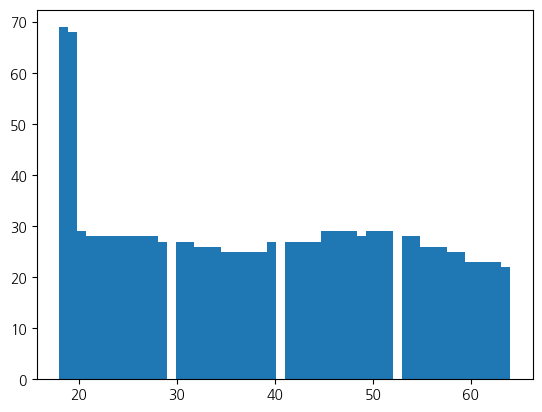

In [668]:
plt.hist(df_data['age'], bins=50)

In [612]:
bmi_age0=df_data.sort_values(['bmi', 'age'], ascending=True)

In [613]:
bmi_age1=df_data.sort_values(['bmi', 'age'], ascending=False)

In [614]:
df_data[df_data['sex']==0]['age']

1       18
2       28
3       33
4       32
8       37
        ..
1324    31
1325    61
1327    51
1329    52
1333    50
Name: age, Length: 676, dtype: int64

In [615]:
df_data[df_data['sex']==1]['bmi']

0       27.90
5       25.74
6       33.44
7       27.74
9       25.84
        ...  
1332    44.70
1334    31.92
1335    36.85
1336    25.80
1337    29.07
Name: bmi, Length: 662, dtype: float64

In [616]:
df_data[df_data['age']>50]['charges']

9       28923.13692
11      27808.72510
13      11090.71780
16      10797.33620
18      10602.38500
           ...     
1327     9377.90470
1329    10325.20600
1330    12629.16560
1332    11411.68500
1337    29141.36030
Name: charges, Length: 356, dtype: float64

<Axes: xlabel='age', ylabel='charges'>

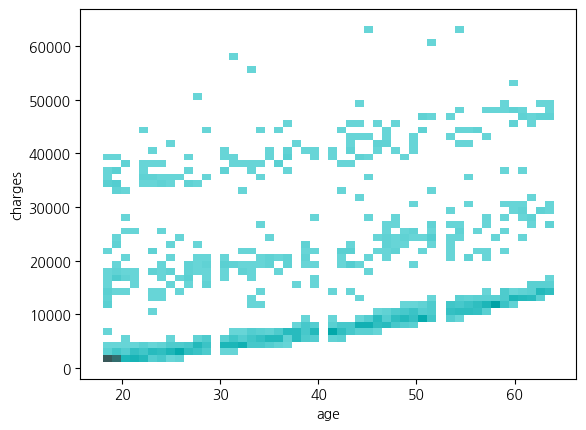

In [617]:
sns.histplot(data =df_data, x='age',y='charges', bins=50, color="darkturquoise")

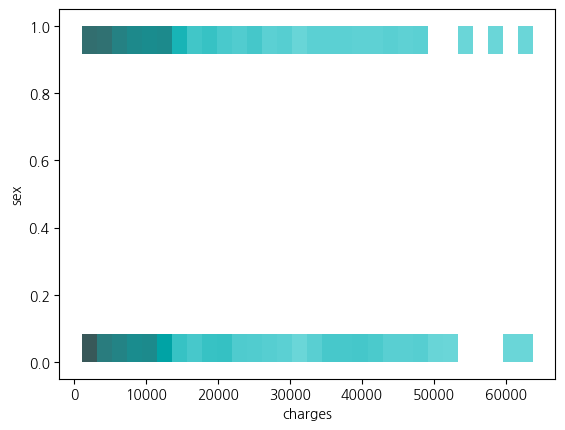

In [618]:
sns.histplot(data= df_data, x='charges', y= 'sex', color= 'darkturquoise')
plt.show()

In [619]:
df_data_2= df_data.copy()

<Axes: xlabel='region', ylabel='charges'>

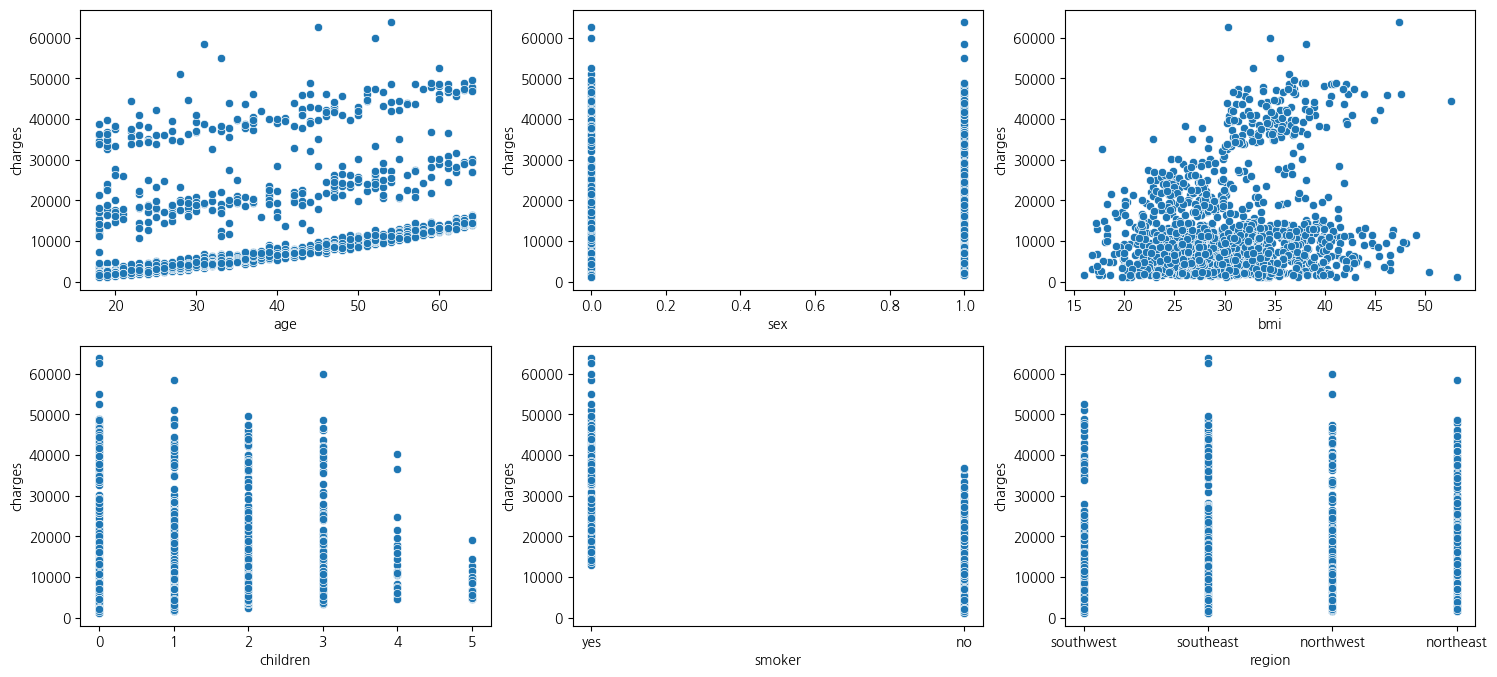

In [620]:
fig, ((ax1, ax2, ax3),(ax4, ax5,ax6))=plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(18,8)
sns.scatterplot(data = df_data_1, x='age', y='charges',ax=ax1)
sns.scatterplot(data = df_data_1, x='sex', y='charges',ax=ax2)
sns.scatterplot(data = df_data_1, x='bmi', y='charges',ax=ax3)
sns.scatterplot(data = df_data_1, x='children', y='charges',ax=ax4)
sns.scatterplot(data = df_data_1, x='smoker', y='charges',ax=ax5)
sns.scatterplot(data = df_data_1, x='region', y='charges',ax=ax6)

In [621]:
import numpy as np

In [622]:
charges_q1 = np.percentile(df_data_1['charges'],20)
charges_q1

3991.5757200000003

In [623]:
charges_q3 = np.percentile(df_data_1['charges'],80)
charges_q3

20260.626406000003

In [624]:
charges_IQR = charges_q3 - charges_q1
charges_IQR

16269.050686000002

In [625]:
df_data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.795217,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [626]:
df_data_1_IQR = df_data_1[(df_data_1['charges']>=(charges_q1 - (1.5*charges_IQR))) &
                          (df_data_1['charges']<=(charges_q3 + (1.5*charges_IQR)))]

In [627]:
df_data_1_IQR

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


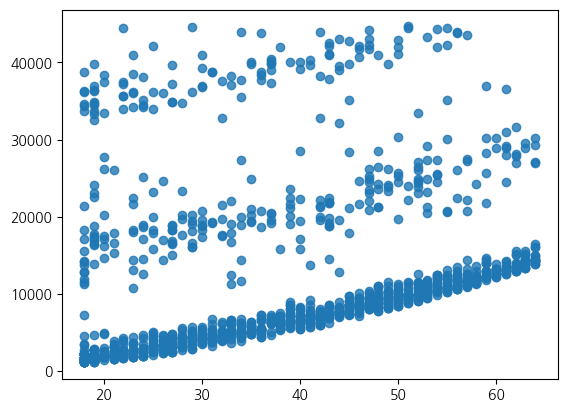

In [628]:
plt.scatter(x=df_data_1_IQR['age'], y=df_data_1_IQR['charges'], alpha=0.8)


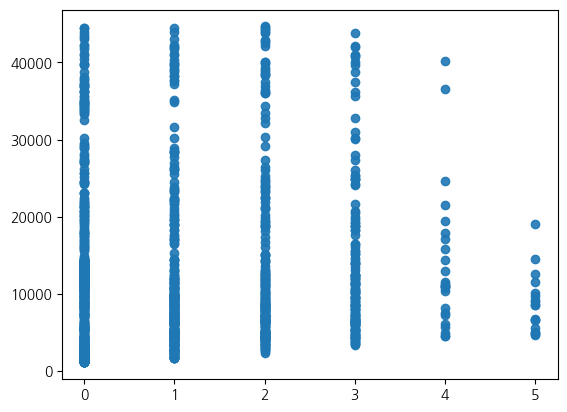

In [629]:
plt.scatter(x=df_data_1_IQR['children'], y=df_data_1_IQR['charges'], alpha=0.9)

In [630]:
cov_matrix = np.cov(df_data['age'], df_data['charges'])
cov_matrix

array([[1.97401387e+02, 5.08748023e+04],
       [5.08748023e+04, 1.46652372e+08]])

In [631]:
cov_value = cov_matrix[0, 1]
print("공분산 값:", cov_value)

공분산 값: 50874.80229785856


In [632]:
cov_matrix1 = np.cov(df_data['children'], df_data['charges'])
cov_matrix1

array([[1.45321275e+00, 9.92674197e+02],
       [9.92674197e+02, 1.46652372e+08]])

In [633]:
cov_value1 = cov_matrix1[0, 1]
print("공분산 값:", cov_value1)

공분산 값: 992.6741970516538


In [634]:
cov_matrix2 = np.cov(df_data['smoker'], df_data['charges'])
cov_matrix2

array([[ 1.62968876e-01, -3.84866703e+03],
       [-3.84866703e+03,  1.46652372e+08]])

In [635]:
cov_value2 = cov_matrix2[0, 1]
print("공분산 값:", cov_value2)

공분산 값: -3848.6670315566903


<Axes: xlabel='children', ylabel='charges'>

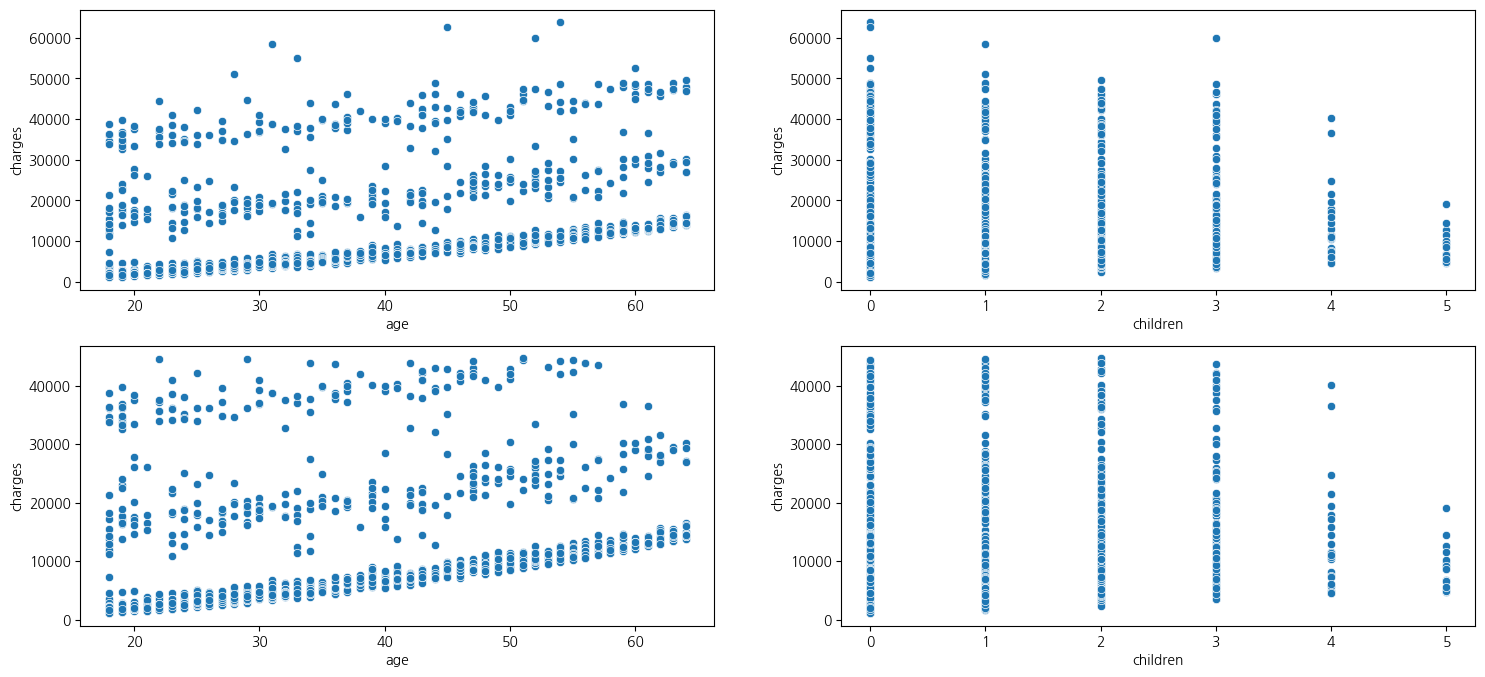

In [ ]:
fig, ((ax1, ax2),(ax3, ax4))=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(18,8)
sns.scatterplot(data = df_data, x='age', y='charges',ax=ax1)
sns.scatterplot(data = df_data_1_IQR, x='age', y='charges',ax=ax3)
sns.scatterplot(data = df_data, x='children', y='charges',ax=ax2)
sns.scatterplot(data = df_data_1_IQR, x='children', y='charges',ax=ax4)


<Axes: xlabel='region', ylabel='charges'>

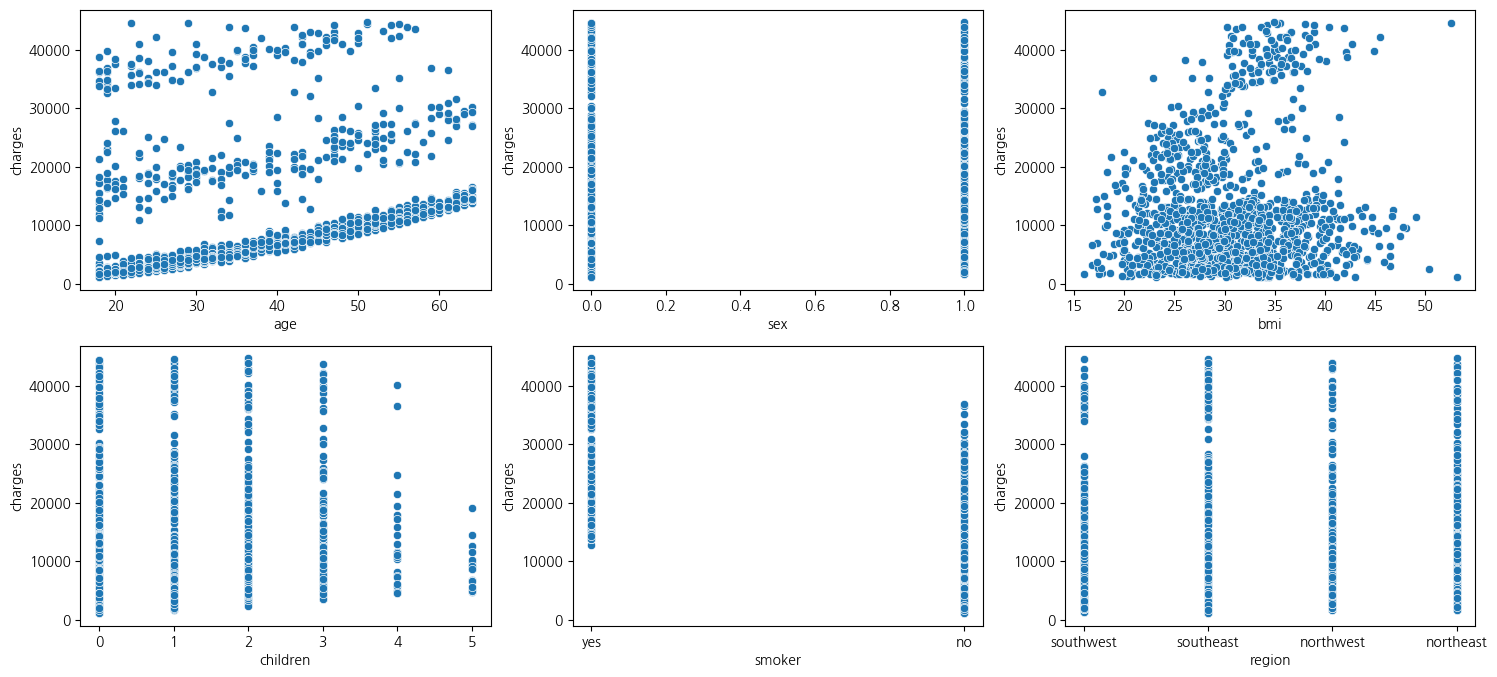

In [ ]:
fig, ((ax1, ax2, ax3),(ax4, ax5,ax6))=plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(18,8)
sns.scatterplot(data = df_data_1_IQR, x='age', y='charges',ax=ax1)
sns.scatterplot(data = df_data_1_IQR, x='sex', y='charges',ax=ax2)
sns.scatterplot(data = df_data_1_IQR, x='bmi', y='charges',ax=ax3)
sns.scatterplot(data = df_data_1_IQR, x='children', y='charges',ax=ax4)
sns.scatterplot(data = df_data_1_IQR, x='smoker', y='charges',ax=ax5)
sns.scatterplot(data = df_data_1_IQR, x='region', y='charges',ax=ax6)

<Axes: xlabel='region', ylabel='age'>

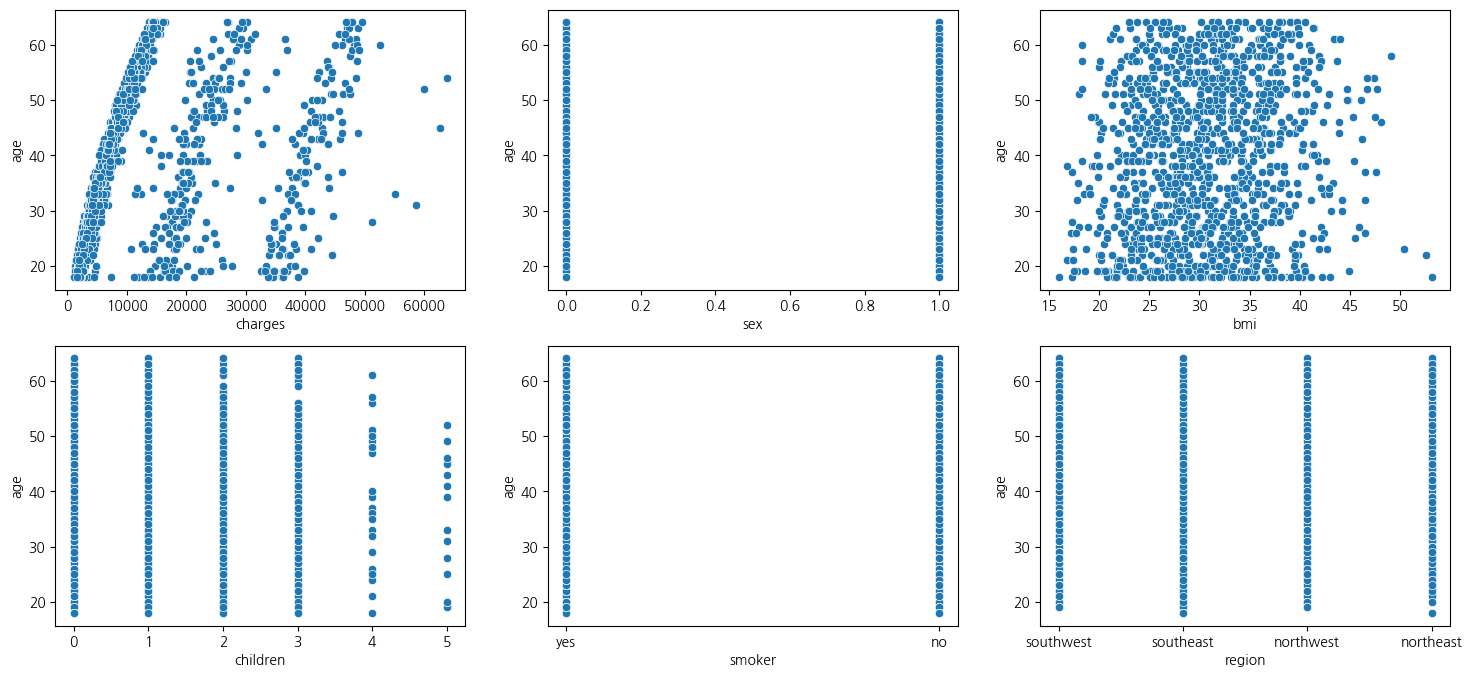

In [ ]:
fig, ((ax1, ax2, ax3),(ax4, ax5,ax6))=plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(18,8)
sns.scatterplot(data = df_data_1, x='charges', y='age',ax=ax1)
sns.scatterplot(data = df_data_1, x='sex', y='age',ax=ax2)
sns.scatterplot(data = df_data_1, x='bmi', y='age',ax=ax3)
sns.scatterplot(data = df_data_1, x='children', y='age',ax=ax4)
sns.scatterplot(data = df_data_1, x='smoker', y='age',ax=ax5)
sns.scatterplot(data = df_data_1, x='region', y='age',ax=ax6)

<Axes: xlabel='bmi', ylabel='region'>

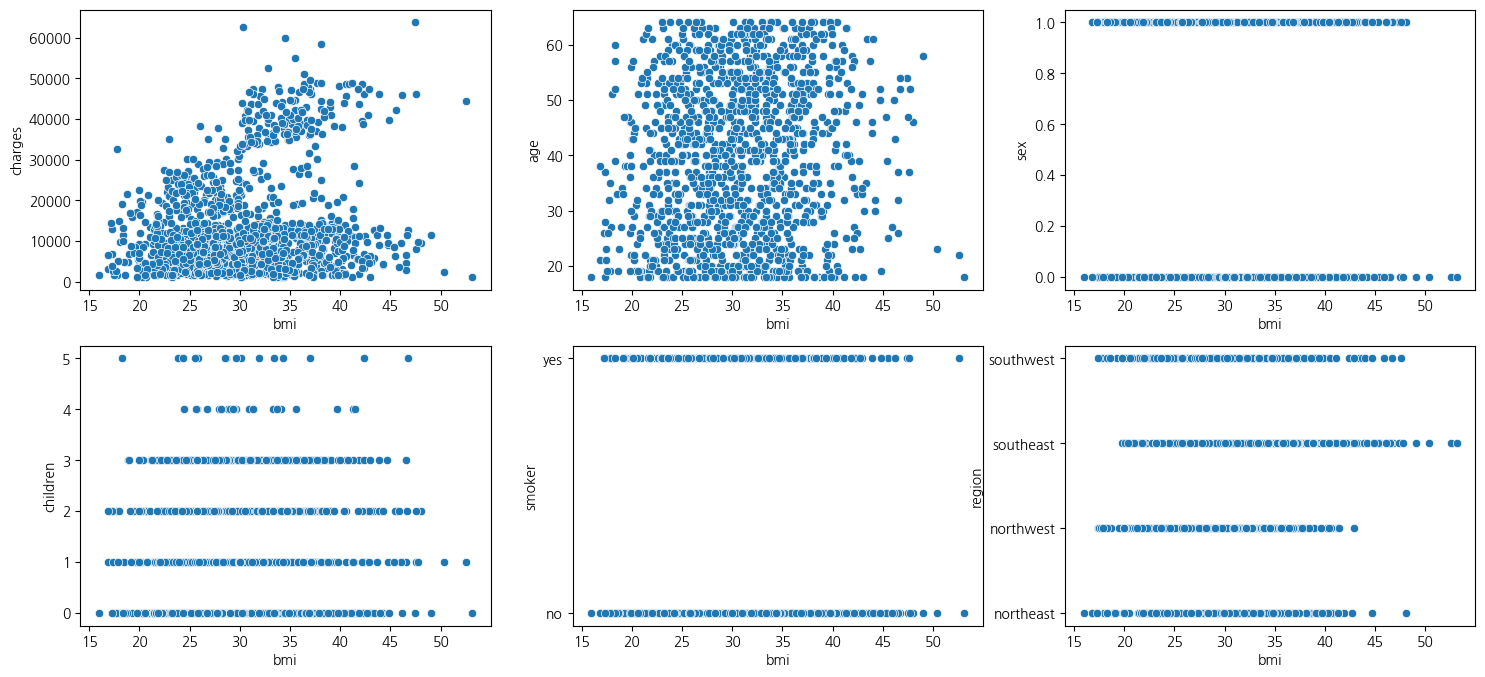

In [ ]:
fig, ((ax1, ax2, ax3),(ax4, ax5,ax6))=plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(18,8)
sns.scatterplot(data = df_data_1, x='bmi', y='charges',ax=ax1)
sns.scatterplot(data = df_data_1, x='bmi', y='age',ax=ax2)
sns.scatterplot(data = df_data_1, x='bmi', y='sex',ax=ax3)
sns.scatterplot(data = df_data_1, x='bmi', y='children',ax=ax4)
sns.scatterplot(data = df_data_1, x='bmi', y='smoker',ax=ax5)
sns.scatterplot(data = df_data_1, x='bmi', y='region',ax=ax6)

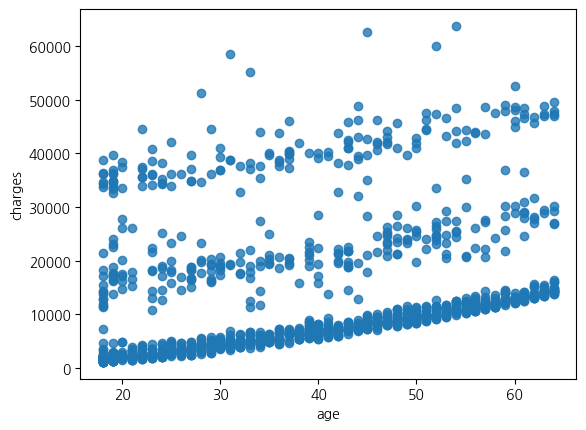

In [ ]:
X= df_data.age.values
Y= df_data.charges.values
import matplotlib.pyplot as plt
plt.scatter(X,Y, alpha=0.8)
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

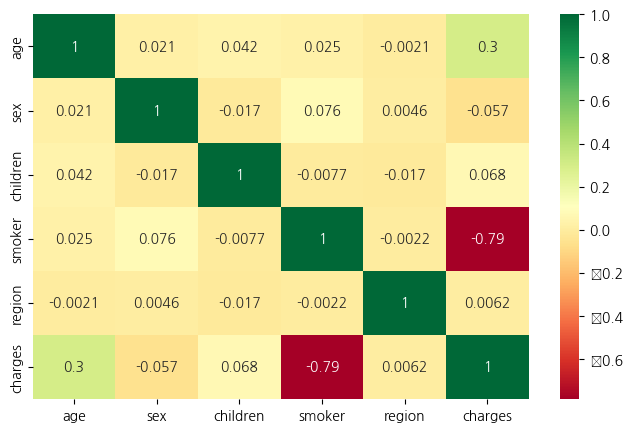

In [641]:
Selected_features = ['age', 'sex', 'children', 'smoker', 'region', 
                     'charges']
X = df_data[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [667]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_data, test_size=0.2, random_state=42) 
print(len(train_set), "개의 train 데이터 +", len(test_set), "개의 test 데이터 =", len(df_data), "개의 총 데이터")

1070 개의 train 데이터 + 268 개의 test 데이터 = 1338 개의 총 데이터


In [662]:
test_set

,age,sex,bmi,children,smoker,region,charges
764,45,1,25.175,2,1,3,9095.06825
887,36,1,30.020,0,1,2,5272.17580
890,64,1,26.885,0,0,2,29330.98315
1293,46,0,25.745,3,1,2,9301.89355
259,19,0,31.920,0,0,2,33750.29180
...,...,...,...,...,...,...,...
109,63,0,35.090,0,0,1,47055.53210
575,58,1,27.170,0,1,2,12222.89830
535,38,0,28.025,1,1,3,6067.12675
543,54,1,47.410,0,0,1,63770.42801


In [663]:
train_set

,age,sex,bmi,children,smoker,region,charges
560,46,1,19.950,2,1,2,9193.83850
1285,47,1,24.320,0,1,3,8534.67180
1142,52,1,24.860,0,1,1,27117.99378
969,39,1,34.320,5,1,1,8596.82780
486,54,1,21.470,3,1,2,12475.35130
...,...,...,...,...,...,...,...
1095,18,1,31.350,4,1,3,4561.18850
1130,39,1,23.870,5,1,1,8582.30230
1294,58,0,25.175,0,1,3,11931.12525
860,37,1,47.600,2,0,0,46113.51100


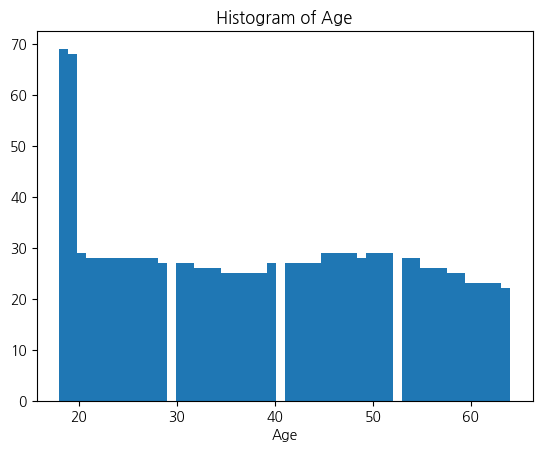

In [676]:
plt.hist(df_data['age'], bins=50)
plt.xlabel('Age')
plt.title('Histogram of Age')
plt.show()


<Axes: xlabel='charges', ylabel='Density'>

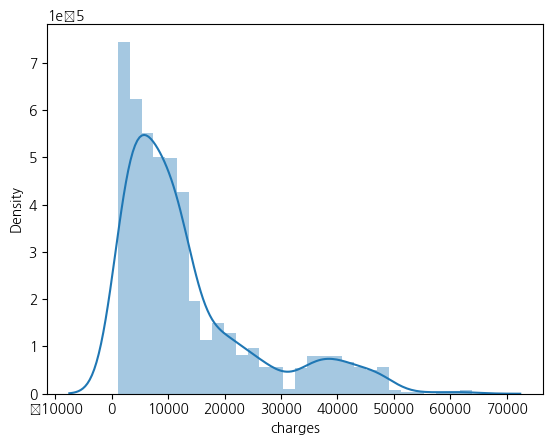

In [687]:
sns.distplot(df_data['charges'])

<Axes: xlabel='charges', ylabel='Density'>

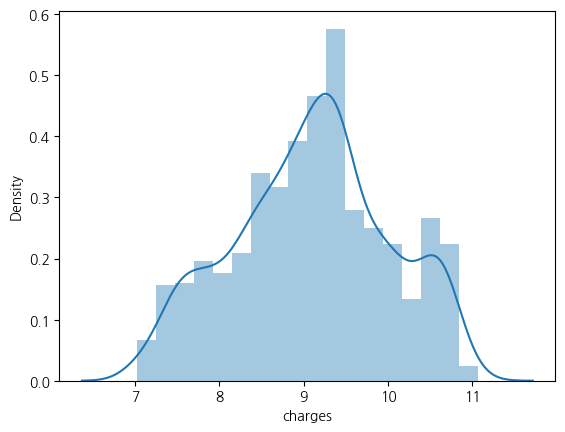

In [693]:
log_df_charges = np.log(df_data['charges'])
sns.distplot(log_df_charges)

In [696]:
#문자열 속성 가변수로 카테고리화
#get_dummies는 컬럼 미지정시 문자열 속성들을 변환 수행
print("before get dummies train.shape : {}".format(df_data.shape))
data_oh = pd.get_dummies(df_data)
print("after get dummies train.shape : {}".format(df_data.shape))
null_column = data_oh.isnull().sum()[df_data.isnull().sum() > 0]

print(df_data.dtypes[null_column.index])

before get dummies train.shape : (1338, 7)
after get dummies train.shape : (1338, 7)
Series([], dtype: object)
